Create a   logistic    regression model  on social network ads.csv    to   
perform    classification    on given dataset. Compute Confusion matrix to find
TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall .

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
df.shape

(400, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.isna().sum().any()

False

In [5]:
# for disabling warnings
import warnings
warnings.filterwarnings('ignore')

x = df.iloc[ : , [2,3]].values
#  : - mhanje all rows, and 2,3 mhanje 2 and 3 columns 
#  2 and 3 cols are age and salary
# means apan age and salary cha base var predict karu toh purchase karto or nahi
y = df.iloc[ : , [4]].values
# y madhe only 1/0 means purchased or not

# model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state=0)

sc = StandardScaler()
# standardscaler is used for standardizing featuers by removing mean to unit variance
xtrain = sc.fit_transform(xtrain)
# This operation centers the data by subtracting the mean and scales it
# by dividing by the standard deviation.
xtest = sc.transform(xtest)
# This ensures that the same transformation is applied 
# to both training and test data, maintaining consistency.

# standardscaling will help to train the LogisticReg model more efficiently
classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain,ytrain)

ypred = classifier.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

Confusion matrix 
 [[65  3]
 [ 8 24]]

Accuracy: 0.89
Error Rate: 0.11
Precision: 0.89
Recall: 0.75


NameError: name 'plt' is not defined

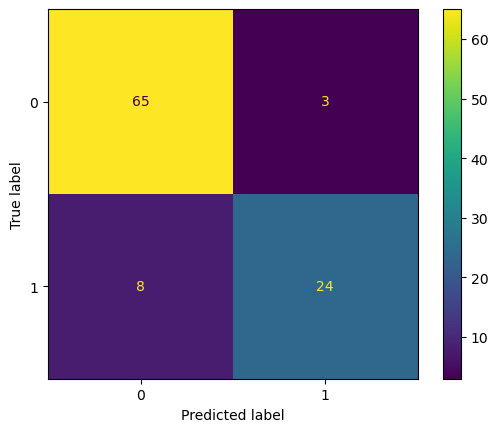

In [6]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(ytest, ypred)

print('Confusion matrix \n', cm)
# Extract TP, FP, TN, FN from the confusion matrix
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Compute Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)
print("\nAccuracy:", accuracy)

# Compute Error Rate
error_rate = (FP + FN) / (TP + FP + TN + FN)
print("Error Rate:", error_rate)

# Compute Precision
precision = TP / (TP + FP)
print("Precision:", precision.round(2))

# Compute Recall
recall = TP / (TP + FN)
print("Recall:", recall)

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [20]:
# checking accuracy using accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy score : ', accuracy_score(ytest,ypred)*100, "%")

Accuracy score :  89.0 %


In [22]:
# Classification report
cl_report = classification_report(ytest, y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [25]:
# extra
comp_table = pd.DataFrame({'Actual' : ytest.ravel(), 'Predicted': ypred.ravel()})
comp_table

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1
